# Radiative Transfer, Transmission and Emission

This week we will playing with radiative transfer through a planetary atmosphere, using some more and less realistic models that help demonstrate important concepts about transmission, emission, and global energy balance. Adapted from Zach Berta-Thompson.

In [37]:
import matplotlib.pyplot as plt, numpy as np
import astropy.units as u, astropy.constants as c
%matplotlib inline

It might be useful to store functions and blocks of code in Python [modules](https://jakevdp.github.io/WhirlwindTourOfPython/13-modules-and-packages.html), which you `import` into your notebook and can then use. For example, see the `tools.py` file in this same directory, which contains the functions used in the previous programming project, and the block of code below. Look at `tools.py` to see what functions are available to you to use in this assignment.

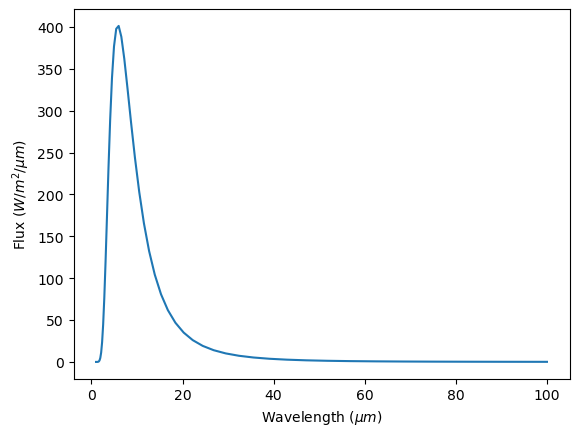

In [38]:
import tools
w = np.logspace(0,2)*u.um
plt.plot(w, tools.planck_flux(w, 500*u.K))
plt.xlabel('Wavelength ($\mu m$)'); plt.ylabel('Flux ($W/m^2/\mu m$)');

### Q1: Transmission through Earth's Atmosphere

The file `earthtransmission.txt` contains a model for the fractional transmittance $t_\lambda$ through Earth's atmosphere, looking straight up from Cerro Paranal in northern Chile. If you want, you can play around and calculate your own models at the [ESO SkyCalc](http://www.eso.org/observing/etc/bin/gen/form?INS.MODE=swspectr+INS.NAME=SKYCALC). This transmittance $t_\lambda$ is the fraction of light of a given wavelength that makes it through the atmosphere, which we can write as $t_\lambda = I_\lambda({\rm surface})/I_\lambda({\rm above~atmosphere})$. 

+ Plot the transmission through Earth's atmosphere vs. wavelength.

+ The photometric filters J, H, and K are commonly used in infrared astronomy. J runs from 1.15 to 1.35$\mu$m, H from 1.5 to 1.8$\mu$m, and K from 2 to 2.4$\mu$m (approximately). Plot a shaded vertical region corresponding to each bandpass (you want the function `plt.axvspan`). Comment briefly on how the bandpasses were defined.

+ Challenge question: to what molecule do the absorption features between 1 and 2.5 $\mu$m correspond?

In [39]:
from astropy.io import ascii
data = ascii.read('earthtransmission.txt')

Text(0, 0.5, 'Fractional transmission')

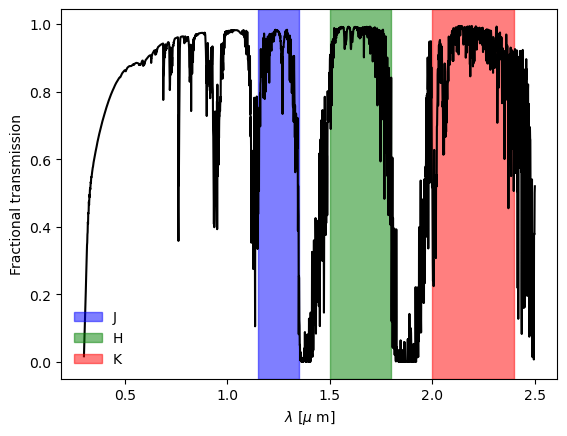

In [40]:
plt.axvspan(1.15, 1.35, color = 'blue', alpha = 0.5, label = 'J')
plt.axvspan(1.5, 1.8, color = 'green', alpha = 0.5, label = 'H')
plt.axvspan(2, 2.4, color = 'red', alpha = 0.5, label = 'K')
plt.plot(data['wavelength'], data['transmission'], color = 'k', zorder = 5)
plt.legend(frameon = False)
plt.xlabel(r'$\lambda$ [$\mu$ m]')
plt.ylabel('Fractional transmission')

The alignment of the common bandpasses with regions where the fractional transmission is higher is clearly intention. More photons of the energies corresponding to these wavelenths are recieved and therefore the signal in these bands is higher. If one of the bands were to be shifted into a region where the fractional transmission was much lower, the signal would be more difficult to resolve. 

The absorption features between 1 and 2.5 $\mu$ m are the result of water vapor in the atmosphere.

+ Imagine standing on the surface of the Earth with the Sun directly overhead ($\theta_z = 0^\circ$, where $\theta_z$ is the angle away from the zenith). Plot the spectrum of flux we would receive at the surface of the Earth, comparing (in the same plot) the actual flux received to the flux we would receive if there were no atmosphere. (You can approximate the Sun as a perfect thermal emitter with a radius of $1~R_\odot$ and $T_{\odot} = (L_\odot/4\pi R_\odot^2\sigma_{\rm SB})^{1/4}$, at a distance of $1~AU$.)

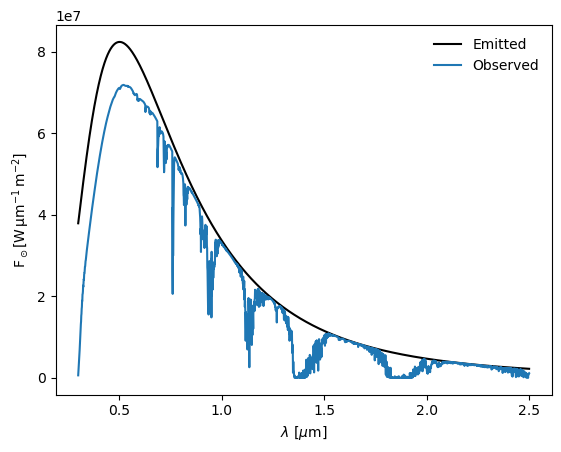

In [41]:
sigma_sb = c.sigma_sb
L = c.L_sun
R = c.R_sun
T_sun = (L/(4*np.pi * R**2 * sigma_sb))**(1/4)
solar_flux = tools.planck_flux(data['wavelength']*u.micrometer, T_sun)
solar_flux_obs = solar_flux * data['transmission']
plt.plot(data['wavelength'], solar_flux, color = 'k', label = r'Emitted')
plt.plot(data['wavelength'], solar_flux_obs, label = r'Observed')
yunits = format(solar_flux.unit.to_string('latex_inline'))
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel(r'F$_\odot$'  + f"[{format(yunits)}]")
plt.legend(frameon = False)

+ Plot the optical depth $\tau_\lambda$ through Earth's atmosphere, considering a vertical path straight up out of the atmopshere. (Regardless of integration direction, quote this as a positive $\tau$).  You can check the order of magnitude of your plot by considering how the optical depth should vary as transmission goes from small (that is, where the least amount of light is let through) to large.


It's true that $\frac{I_{out}}{I_{in}} = e^{-\tau}$ and the fractional transmission $T$ is $\frac{I_{out}}{I_{in}}$. So, $\ln{T} = -\tau$

Text(0, 0.5, 'Optical depth')

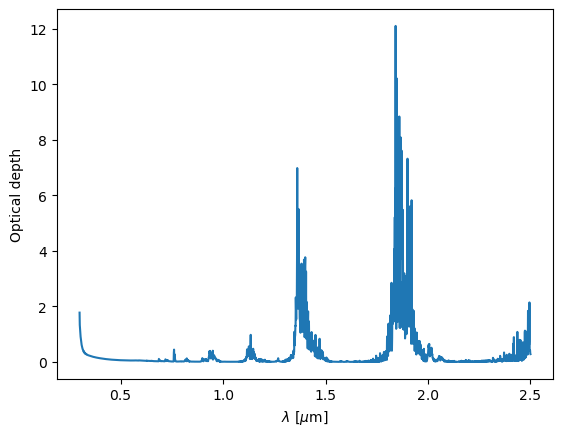

In [42]:
opt_depth = -np.log10(data['transmission'])
plt.plot(data['wavelength'], opt_depth)
plt.xlabel(r'$\lambda$ [$\mu$m]')
plt.ylabel('Optical depth')

<font color='seagreen'>

Note that the optical depth exceeds 1 only for fairly deep absorption lines (and pushing into the near-UV). There are many atmospheric windows with $\tau < 0.1$, meaning on average 1/10 photons interacts with the atmosphere. That's pretty clear!

Write an expression for the optical depth along a slant path $\tau_{\lambda}(\theta_z)$, if you are looking an angle $\theta_z$ away from zenith. This is a simple expression, and you can derive it with one triangle (with leg $s_z$, the zenith distance, and hypotenuse $s$, the distance along the slant path). Express $\tau_{\lambda}(\theta_z)$ in terms of the optical depth for a vertical path through the atmosphere and $\theta_z$.

+ Plot the solar flux at several representive angles of $\theta_z$ (make sure you get something close to 90 degrees)

**answer:**
If we define the optical depth along a vertical path as $\tau_z = \int \alpha dz$ and the optical depth along a slanted path as $\tau_s = \int \alpha ds$, it's true that $\cos{\theta_z} = \frac{dz}{ds}$. Therefore, $\tau_s = \int \alpha \frac{dz}{\cos{\theta_z}} = \frac{\tau_z}{\cos{\theta_z}}$. So, optical depth will increase with slant (as the length $ds$ increases). On the other hand, flux will decrease will slant as fewer field lines will pass through some arbitrary area $\vec{A}$ that makes angle $\theta_z$ with the azimuthal. 

Text(0, 0.5, 'F$_\\odot$[$\\mathrm{W\\,\\mu m^{-1}\\,m^{-2}}$]')

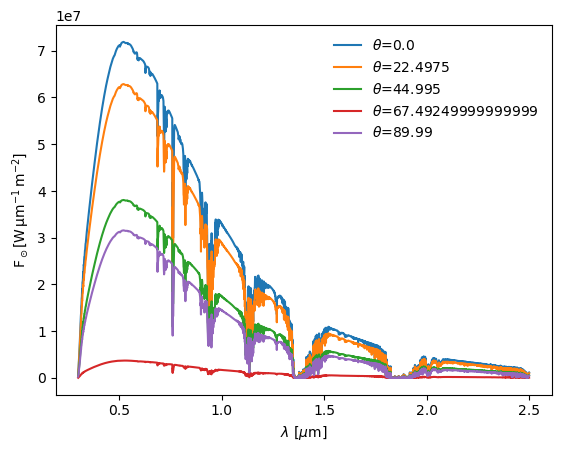

In [43]:
theta = np.linspace(0, 89.99, 5)
for t in theta: 
    flux = tools.planck_flux(data['wavelength']*u.micrometer, T_sun)
    flux = np.abs(flux*np.cos(t))
    plt.plot(data['wavelength'], flux*data['transmission'], label = r"$\theta$=" + f"{t}")
plt.legend(frameon = False)
plt.xlabel(r'$\lambda$ [$\mu$m]')
yunits = format(flux.unit.to_string('latex_inline'))
plt.ylabel(r'F$_\odot$'  + f"[{format(yunits)}]")

Earth-bound observational astronomers define the quantity "airmass" to be 
$${\rm airmass} = \sec\theta_z$$
where a star that is straight overhead has $\sec\theta_z = 1$ and a star on the horizon has $\sec\theta_z = \infty$. Since $\sec\theta=1/\cos\theta$, the airmass tells us how much atmosphere we are looking through. If something is at very high airmass, we probably want to wait to observe it until it's at low airmass and more light of it's light will make it through the atmosphere.

We use [the magnitude system](https://en.wikipedia.org/wiki/Apparent_magnitude) to express differences in brightness. A difference in magnitudes corresponds to a logarithm of their brightness ratios, with the definition that
$$m_1 - m_0 = -2.5\log_{10}\left(\frac{I_1}{I_0}\right)$$
where $m_1$ and $m_0$ are two magnitudes, and $I_1$ and $I_0$ are the intensities corresponding to those magnitudes. 

+ Plot the transmission function using magnitudes of extinction as the y axis.

+ How many magnitudes of extinction does a star at $\sec\theta_z = 5$ experience in the astronomical $V$-filter (with a wavelength of roughly $0.55~\mu m$)? What about in the $U$-filter ($0.36~\mu m$)? (You can approximate by reading off the plot, or for a challenge, use interpolation to get the value at any wavelength you choose).

**answer:** 

The transmission function $T = \frac{I_1}{I_0}$, so $m_1 - m_0 = -2.5 \log_{10}{T}$ where $m_0$ is the magnitude with no atmospheric interference. 

If the star is at $\theta_z$, $I_1$ = $I_0 \cos{\theta_z}$

In [44]:
def interpolate(target, data): 
    idx=np.abs(data- target).argmin()
    return idx
V = 0.55 # microm 
U = 0.36 #microm 

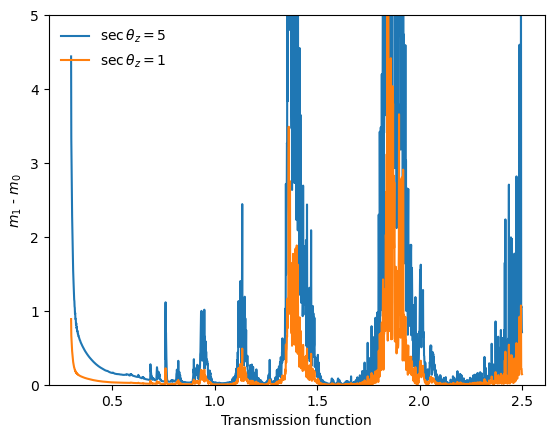

In [45]:
c1 = -2.5*np.log10(data['transmission'])*(1/5)
c2 = -2.5*np.log10(data['transmission'])
plt.plot(data['wavelength'], c2, label = r'$\sec{\theta_z}= 5$')
plt.plot(data['wavelength'], c1,  label = r'$\sec{\theta_z}= 1$')

plt.xlabel(r'Transmission function')
plt.ylabel(r'$m_1$ - $m_0$')
plt.ylim(0,5)
plt.legend(frameon = False, loc = 'upper left')
#plt.xlim(0,2.5)

In [46]:
v_diff = c2[interpolate(V, data['wavelength'])] -c1[interpolate(V, data['wavelength'])]
u_diff = c2[interpolate(U, data['wavelength'])]-c1[interpolate(U, data['wavelength'])] 
print(f"The V-band differs in magnitude by {v_diff} while the U-band differs in magnitude by {u_diff}")

The V-band differs in magnitude by 0.10796465873179133 while the U-band differs in magnitude by 0.3997780302129557


<font color='seagreen'>
It's hard to do ground-based photometry at $U$!

### Q2: Emission from a Planetary Atmosphere

In this question, we will play with a toy model for understanding the emission spectrum of a planet (although the basic concept applies equally well to, for example, a nebula or other cloud of gas/dust). 

Planetary atmospheres are often characterized by the $T-P$ profile, which defines how temperature varies with pressure. Since pressure increases as you go farther down into a planetary atmosphere (assuming hydrostatic equilibrium), the $T-P$ profile characterizes changes in temperature as a function of atmospheric height. Let's imagine a cartoon planetary atmopshere with a $T-P$ profile that follows a power law of the form
$$T(P) = T_{\rm surf}\left(\frac{P}{P_{\rm surf}}\right)^{x}$$

where $P_{\rm surf}$ and $T_{\rm surf}$ are the surface pressure and temperature, and $x$ is some exponent.

+ Derive expressions for $\tau_\lambda(P)$ and $T(\tau_\lambda)$ in this atmosphere, in terms of  $P$, $\tau_\lambda$, $\kappa_\lambda$, and $g$ (the gravitational acceleration). You may assume  $\kappa_\lambda$ and $g$ to be constant throughout the atmosphere, and the atmosphere to be in hydrostatic equilibrium. Assume a plane-parallel atmosphere.

To derive an expression between $\tau$ and $P$, bring together the equation of hydrostatic balance

$$\frac{dP}{dz} = -\rho g$$

and the definition of optical depth

$$d\tau_\lambda = - \kappa_{\lambda} \rho dz $$

to put in $dz = -dP/\rho g$ and find

$$d\tau_\lambda = \frac{\kappa_\lambda}{g} dP$$

which we can integrate from the top of the atmosphere downward 

$$\int^{\tau_\lambda}_{0} d\tau_\lambda = \int^{P}_{0}\frac{\kappa_\lambda}{g} dP$$

which (if $\kappa_\lambda$ is constant) yields

$$\tau_\lambda(P) = \frac{\kappa_\lambda}{g} P.$$

This is why pressure is such a nice vertical coordinate! It's very directly related to optical depth (and with our definition, $\tau$ increases with increasing $P$). Now, to find $T(\tau_{\lambda})$ we can simply plug in $P = \tau_\lambda/\kappa_\lambda{g}$ to our cartoon $T-P$ profile and find

$$T(P) = T_{\rm surf}\left(\frac{P}{P_{\rm surf}}\right)^{x} = T_{\rm surf}\left(\frac{\tau_\lambda g}{P_{\rm surf}\kappa_\lambda}\right)^{x} $$

or if we define the quantity 

$$\tau_{\lambda, \rm surf} = \frac{\kappa_\lambda}{g} P_{\rm surf}$$

to be the optical depth to the surface, then

$$T(P) = T_{\rm surf}\left(\frac{\tau_\lambda}{\tau_{\lambda, \rm surf} }\right)^{x}$$

where of course $\tau_{\lambda, \rm surf}$ will change from wavelength to wavelength depending on the opacities in the atmosphere. ($\tau = 0$ corresponds to us observing the atmosphere from above).


+ Write a Python function that numerically integrates the equation of radiative transfer along a vertical path to determine the outgoing intensity $I_\lambda(0)$ leaving the top of the planet's atmosphere. Write this as a line-by-line radiative transfer code, meaning that you will calculate the intensity at one wavelength at a time. Effectively, you are numerically integrating Rybicki & Lightman Eq 1.29
     + Assume that each layer of the atmosphere emits as a perfect thermal emitter at temperature $T(P)$.
     + Assume that the surface emits as a perfect thermal emitter at temperature $T_{\rm surf}$, so the surface intensity is $I_\lambda(\tau_{\lambda, {\rm surf}}) = B_\lambda(T_{\rm surf})$. Note, it may be helpful to calculate $\tau_{\rm surf, \lambda}$ (the optical depth to the surface). 
     + Perform this integral for a single wavelength at a time. 

In [47]:
import scipy.integrate

def I_outgoing(wave=15*u.um, 
               P_surf=1*u.bar, 
               T_surf=280*u.K, 
               kappa=0.0001*u.m**2/u.kg, ## kappa is constant with wavelength for now
               g=10*u.m/u.s**2, 
               x=1,
               plot=False,
               tau_min=0.01,  ## things get awkward if you actually go to zero
               tau_max=10,
               ntau=100):
    
    
    # calculate the optical depth to the surface
    tau_surf = (kappa/g*P_surf).decompose() ## decompose cancels out units
    if tau_surf <= tau_min:
        tau_surf = tau_min

    # the first term of the integral radiative transfer equation, Eq 1.29 (==transmitted)
    ## YOUR CODE HERE
    I_surf = tools.planck_intensity(wave, T_surf)
    transmitted = I_surf * np.exp(-tau_surf)
    
    # the second term of the integral radiative transfer equation, Eq 1.29 (==emitted)
    tau = np.linspace(tau_min, np.minimum(tau_surf, tau_max), ntau)
    ## YOUR CODE HERE: what's the integrand? (function of tau, tau defined above)
    T = (T_surf*(tau*g/(P_surf*kappa))**x).decompose()
    S_nu = tools.planck_intensity(wave, T)
    integrand = np.exp(-(tau_surf - tau))*S_nu 

    ## YOUR CODE HERE: use np.trapz to do the integration over tau
    emitted = np.trapz(integrand, x = tau)

    
    # this will plot the optical depth versus temperature
    if plot:
        
        print("At a wavelength of {}...".format(wave))
        print(" The original surface intensity is {:.4g}.".format(I_surf))
        print(" The surface intensity transmitted through the atmosphere is {:.4g}.".format(transmitted))
        print(" The emitted contribution from the atmosphere is {:.4g}.".format(emitted))
        print(" The total intensity is {:.4g}.".format(transmitted + emitted))
        print("(P_surf={P_surf:.4}, T_surf={T_surf:.4}, kappa={kappa:.4}, g={g:.4}, x={x:+})".format(**locals()))

        T = T_surf*(tau/tau_surf)**x
        fig, ax = plt.subplots(figsize=(3,3))
        plt.sca(ax)
        plt.plot(T, tau, label='$T$ ($K$)')
        plt.ylabel(r'$\tau_\lambda$')
        plt.xlabel('$T$ ($K$)')
        
    return transmitted + emitted

+ Show that you get $I_{\lambda = 15\mu m} = 2.37~W/m^2/\mu m/sr$ for a wavelength of $\lambda = 15~\mu m$, if we use values of 
    + $T_{\rm surf} = 280~K$
    + $P_{\rm surf} = 1~bar$
    + $x=1$
    + $\kappa_\lambda = 0.0001~m^2/kg$
    + $g=10~m/s^2$

At a wavelength of 15.0 um...
 The original surface intensity is 5.273 W / (m2 micron sr).
 The surface intensity transmitted through the atmosphere is 1.94 W / (m2 micron sr).
 The emitted contribution from the atmosphere is 0.881 W / (m2 micron sr).
 The total intensity is 2.821 W / (m2 micron sr).
(P_surf=1.0 bar, T_surf=280.0 K, kappa=0.0001 m2 / kg, g=10.0 m / s2, x=+1)


<Quantity 2.82092439 W / (m2 micron sr)>

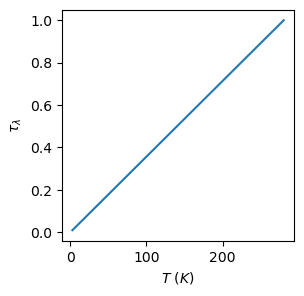

In [48]:
I_outgoing(plot=True, ntau=100, x=1)

+ Imagine our atmosphere contains one gas. Let's call it "ceceliapaynium". Its mass opacity is given by the function
$$\kappa_\lambda = \kappa_c \exp \left[-\frac{1}{2}\left(\frac{\lambda - \lambda_c}{\sigma_c}\right)^2 \right]$$
which is opaque near the center of the line at $\lambda_c$ and more transparent for wavelengths farther from the line center (this is standard for a single spectral line). We will start out with $\kappa_c = 0.0001~m^2/kg$, $\lambda_c = 15~\mu m$, $\sigma_c = 1 ~\mu m$.

In [49]:
def kappa_ceciliapaynium(w, kappa_0=0.0001*u.m**2/u.kg, w_0=15*u.um, sigma_0=1*u.um):
    '''
    Returns the mass opacity coefficient (m^2/kg) 
    as a function of wavelength,
    for the imaginary molecule ceceliapaynium.
    '''
    exponent = (-1/2) * ((w - w_0)/sigma_0)**2
    kappa_lambda = kappa_0 * np.exp(exponent)
    
    return kappa_lambda

<font color='seagreen'>
The following should get you the same answer as before, since at $w=w_0$, $\kappa$ is equal to the value we used before:

At a wavelength of 15.0 um...
 The original surface intensity is 5.273 W / (m2 micron sr).
 The surface intensity transmitted through the atmosphere is 1.94 W / (m2 micron sr).
 The emitted contribution from the atmosphere is 0.881 W / (m2 micron sr).
 The total intensity is 2.821 W / (m2 micron sr).
(P_surf=1.0 bar, T_surf=280.0 K, kappa=0.0001 m2 / kg, g=10.0 m / s2, x=+1)


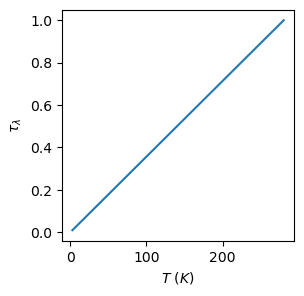

In [50]:
w = 15*u.um
I_out = I_outgoing(plot=True, ntau=100, kappa=kappa_ceciliapaynium(w)) ## supplying the kappa for this wavelength

+ Now, let's vary the temperature structure of the atmosphere. Plot the outgoing intensity spectra for the three cases of $x=(-1, 0, 1)$, with at least 100 wavelengths spanning $1-100~\mu m$. 

To do this properly and maintain the right units (unlike in the last project!) create an array I as an array of zeros with the right units. To set each element, use `I[i] += {value}` where value also has the right units.


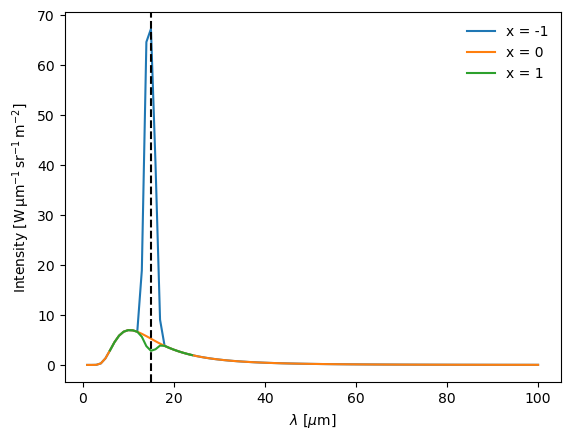

In [51]:
wavelength = np.linspace(1, 100, 100)*u.um
x = [-1, 0, 1]
I = np.zeros((len(x), len(wavelength)))
I = I * I_out.unit

for i, val in enumerate(x): 
    for j, w in enumerate(wavelength):
        I[i, j] += I_outgoing(wave=w, ntau=1000, x = val, kappa = kappa_ceciliapaynium(w))
    plt.plot(wavelength, I[i, :], label = f"x = {val}")

plt.xlabel(r"$\lambda$ [$\mu$m]")
yunits = format(I.unit.to_string('latex_inline'))
plt.ylabel(f"Intensity [{yunits}]")
plt.legend(frameon = False)
plt.axvline(15, linestyle = '--', color = 'k', label = r'$\lambda_0$ = 15 $\mu$m')

+ Discuss qualitatively how the appearance of the absorption or emission feature relates to the vertical temperature profile (think about which layer is hotter and which is colder in each temperature profile; you may want to refer to Kirchoff's law--not the one in our textbook, but the one you learned in intro astronomy).

### Discussion
In all three cases, the optical depth is maximized at lower wavelengths. When $\lambda < \lambda_c$, $\kappa$ and therefore $\tau$ are maximal. When $\lambda = \lambda_c$, the medium switches from optically thick to optically thin. In the $x = -1$ case, the temperature becomes largest when the medium is optically thin whereas in the $x=0$ case, the temperature does not depend on the opacity, and in the $x = 1$ case, the temperature is greatest when the medium is densest. 

Therefore, our spectrum aligns with Kirchoff's laws, which tell us that a hot low density object ($x=-1$ case) produces a bright emission line, a hot dense object ($x=0$ case) produces a continuous spectrum, and a hot dense case ($x =1$) that is in front of a continuous source produces an absorption line spectrum. With this knowledge, we can order the layers of atmosphere and see that our lowest density layer ($x=-1$) must the thin upper envelope of the planet, the isothermal case ($x=0$) must be beneath that, and the hot and dense layer ($x=1$) therefore falls at the bottom as it must be percieved through the isothermal layer in order to produce the absorption feature we see. 

### AI Statement

When my calculations produced unit errors or dimension mismatches, I used AI to help correct my astropy units. But, I had to pretty heavily refine my prompts by specifying which quantities carried units, what operations I was performing, and what physical relationships I expected. 